# **We need to predict if an Employee will get promoted or not**

**Reading the dataset**

In [1]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()


Saving HR_Data.csv to HR_Data.csv


In [2]:
data = pd.read_csv(io.BytesIO(uploaded['HR_Data.csv']))

**Importing Libraries**

In [3]:
import numpy as np
import pandas as pd
#Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#We will use sklearn for building logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
from warnings import simplefilter
import statsmodels.api as sm
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

In [4]:
#!pip install sklearn.utils.testing

**Building Data Understanding**

In [5]:
#shape of dataset
print("shape of dataframe is : ", data.shape)

shape of dataframe is :  (54808, 14)


In [6]:
# summary of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [7]:
#Get Statistical details of data
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [8]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


**Data Cleaning**

In [9]:
#Drop employee_id column as it is just a unique id
data.drop("employee_id",inplace=True,axis=1)

In [10]:
#checking number of null values
data.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [11]:
#Checking null percentage
data.isnull().mean()*100

department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [12]:
#fill missing value
#We will fill previous uear rating iwth "0" if not present (One can fill with anything else as well based on their undertsanding of data)
data["previous_year_rating"]= data["previous_year_rating"].fillna(0)
#change type to int
data["previous_year_rating"]= data["previous_year_rating"].astype("int")

In [13]:
#Find out mode value for education
data["education"].mode()

0    Bachelor's
Name: education, dtype: object

In [14]:
#fill missing value with mode
data["education"]= data["education"].fillna("Bachelor's")

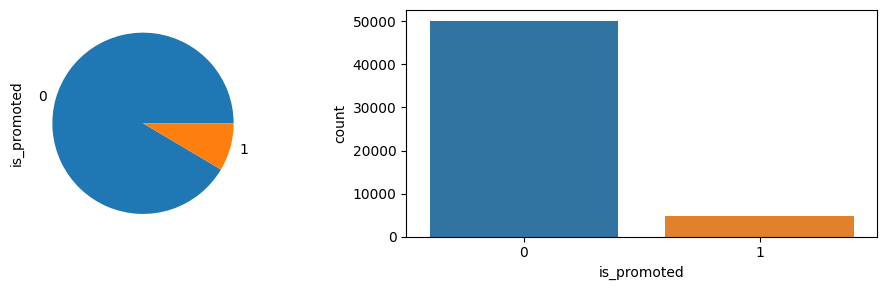

In [15]:
# chart for distribution of target variable
# (One can use any visualization or chart type he/she is comfortable with)
fig= plt.figure(figsize=(10,3) )
fig.add_subplot(1,2,1)
a= data["is_promoted"].value_counts(normalize=True).plot.pie()
fig.add_subplot(1,2,2)
churnchart=sns.countplot(x=data["is_promoted"])
plt.tight_layout()
plt.show()

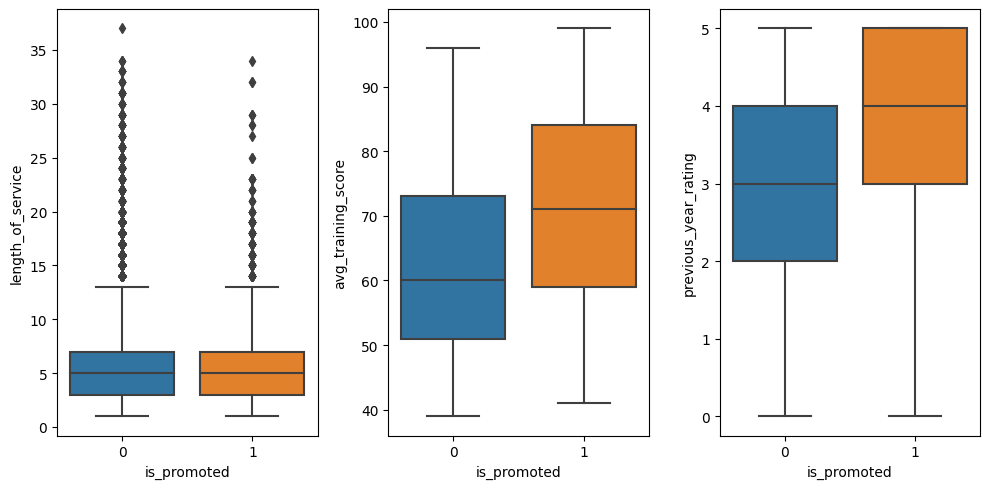

In [16]:
# Visualize relationship between promoted and other features
fig= plt.figure(figsize=(10,5) )
fig.add_subplot(1,3,1)
ar_6=sns.boxplot(x=data["is_promoted"],y=data["length_of_service"])
fig.add_subplot(1,3,2)
ar_6=sns.boxplot(x=data["is_promoted"],y=data["avg_training_score"])
fig.add_subplot(1,3,3)
ar_6=sns.boxplot(x=data["is_promoted"],y=data["previous_year_rating"])
plt.tight_layout()
plt.show()

In [17]:
data.corr().round(2)

<ipython-input-17-10d079c39022>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().round(2)


,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
no_of_trainings,1.00,-0.08,-0.06,-0.06,-0.05,-0.01,0.04,-0.02
age,-0.08,1.00,0.18,0.66,-0.03,-0.01,-0.05,-0.02
previous_year_rating,-0.06,0.18,1.00,0.19,0.27,0.02,0.06,0.13
length_of_service,-0.06,0.66,0.19,1.00,-0.08,-0.04,-0.04,-0.01
KPIs_met >80%,-0.05,-0.03,0.27,-0.08,1.00,0.10,0.08,0.22
awards_won?,-0.01,-0.01,0.02,-0.04,0.10,1.00,0.07,0.20
avg_training_score,0.04,-0.05,0.06,-0.04,0.08,0.07,1.00,0.18
is_promoted,-0.02,-0.02,0.13,-0.01,0.22,0.20,0.18,1.00


<ipython-input-18-77da157458af>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_plot = sns.heatmap(data.corr().round(2),annot = True,linewidths=3 )


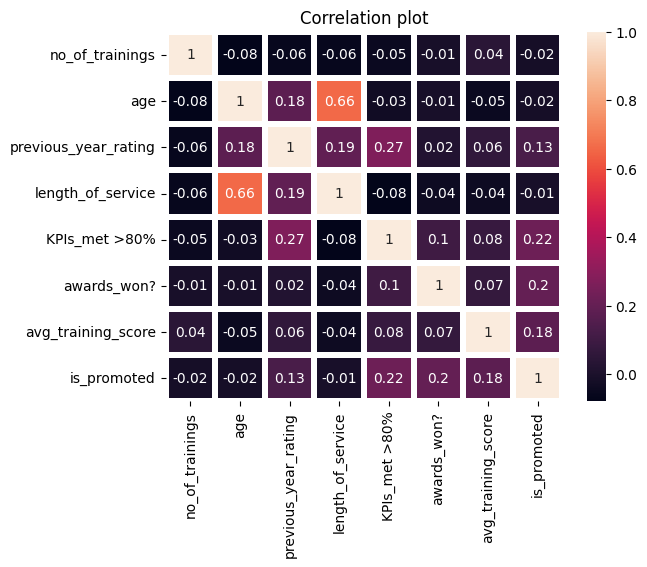

In [18]:
#correlation between features
corr_plot = sns.heatmap(data.corr().round(2),annot = True,linewidths=3 )
plt.title("Correlation plot")
plt.show()

#Age and leght of service are correlated (Though not a very strong correlation)

In [19]:
#list of other categorical variables
categorical_cols = data.select_dtypes(["object"]).columns
categorical_cols

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [20]:
#Create dummy variables
ds=pd.get_dummies(data[categorical_cols],drop_first=True)
ds.head()

,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
#concat newly created columns with original dataframe
data=pd.concat([data,ds],axis=1)
#Drop original columns
data.drop(categorical_cols,axis=1,inplace=True)

**Splitting Data into test and train**

In [22]:
from sklearn.model_selection import train_test_split
#split data into dependent variables(X) and independent variable(y) that we would predict
Y = data.pop("is_promoted")
X = data

In [23]:
#Let’s split X and y using Train test split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,random_state=42)
#get shape of train and test data
print("train size X : ",X_train.shape)
print("train size y : ",Y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",Y_test.shape)

train size X :  (43846, 53)
train size y :  (43846,)
test size X :  (10962, 53)
test size y :  (10962,)


In [24]:
#check for distribution of labels
#Our 91% of data is "not promoted" while "9%" oif data is of employees who are promoted
Y_train.value_counts(normalize=True)

0    0.914245
1    0.085755
Name: is_promoted, dtype: float64

In [25]:
#check for distribution of labels
Y_train.value_counts()

#Unbalanced classification problem

0    40086
1     3760
Name: is_promoted, dtype: int64

In [26]:
#import library
from sklearn.linear_model import LogisticRegression
#make instance of model with default parameters except class weight
#as we will add class weights due to class imbalance problem
#lr_basemodel =LogisticRegression(class_weight={0:0.1,1:0.9})
lr_basemodel =LogisticRegression()
# train model to learn relationships between input and output variables
lr_basemodel.fit(X_train,Y_train)

LogisticRegression()

[[10002    52]
 [  802   106]]


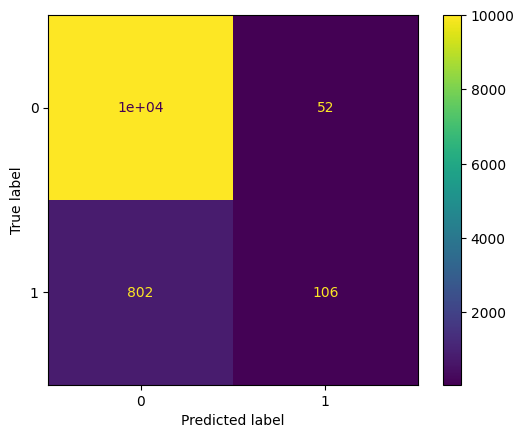

In [27]:
y_pred_test = lr_basemodel.predict(X_test)
ConfusionMatrix = confusion_matrix(Y_test, y_pred_test)
print(ConfusionMatrix)

disp = ConfusionMatrixDisplay(confusion_matrix=ConfusionMatrix, display_labels=lr_basemodel.classes_)
disp.plot()
plt.show()

#Change it from column to rows

In [28]:
 #Accuracy score
print("Accuracy score  test dataset:  t", accuracy_score(Y_test,y_pred_test))
#Precision score
print("precision score  test dataset:  t", precision_score(Y_test,y_pred_test))
#Recall Score
print("Recall score  test dataset:  t", recall_score(Y_test,y_pred_test))

Accuracy score  test dataset:  t 0.9220945083014048
precision score  test dataset:  t 0.6708860759493671
Recall score  test dataset:  t 0.11674008810572688


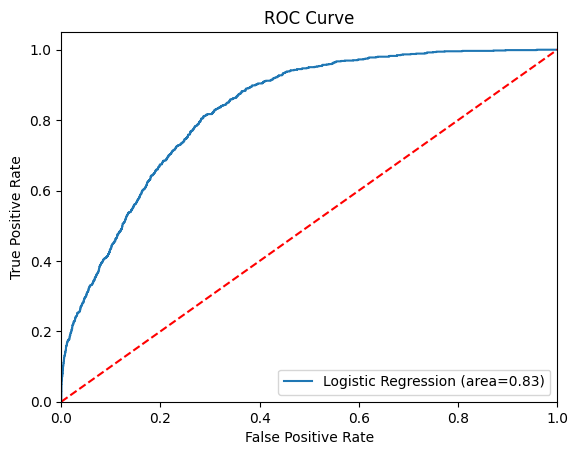

In [29]:
fpr, tpr, thresholds = roc_curve(Y_test, lr_basemodel.predict_proba(X_test)[:,1])
auc_var=auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area=%0.2f)' % auc_var)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# **Giving Different Weight to each Class**

In [30]:
#import library
from sklearn.linear_model import LogisticRegression
#make instance of model with default parameters except class weight
#as we will add class weights due to class imbalance problem
lr_diff_weight_model =LogisticRegression(class_weight={0:1,1:10})
# train model to learn relationships between input and output variables
lr_diff_weight_model.fit(X_train,Y_train)

LogisticRegression(class_weight={0: 1, 1: 10})

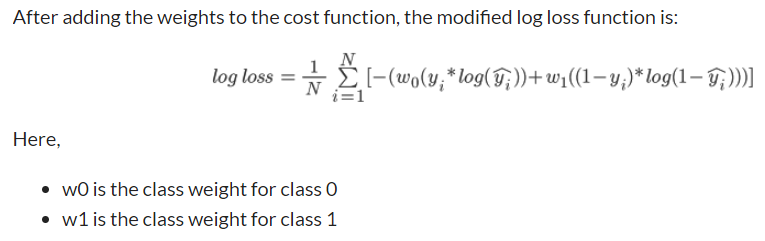

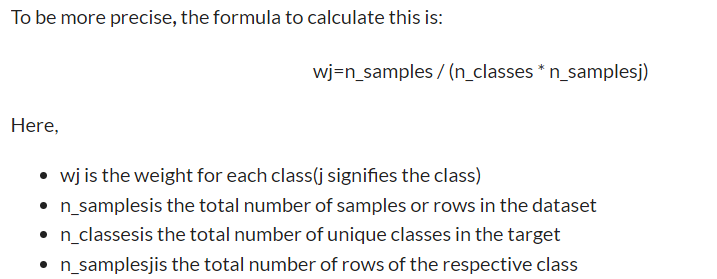

[[7422 2632]
 [ 207  701]]


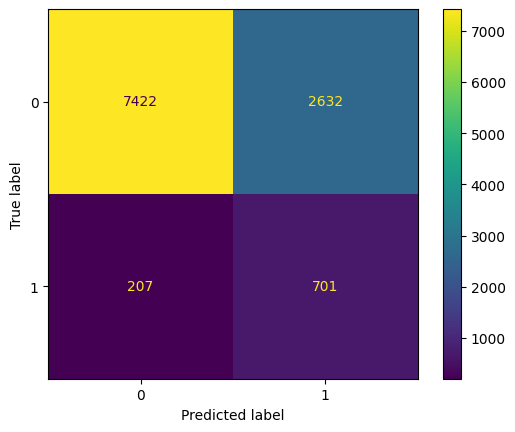

In [31]:
y_pred_test = lr_diff_weight_model.predict(X_test)
ConfusionMatrix = confusion_matrix(Y_test, y_pred_test)
print(ConfusionMatrix)

disp = ConfusionMatrixDisplay(confusion_matrix=ConfusionMatrix, display_labels=lr_diff_weight_model.classes_)
disp.plot()
plt.show()

In [32]:
# create onfusion matrix
y_pred_prob_test = lr_diff_weight_model.predict_proba(X_test)[:, 1]
y_pred_test = lr_diff_weight_model.predict(X_test)

In [33]:
#Accuracy score
print("Accuracy score  test dataset:  t", accuracy_score(Y_test,y_pred_test))
#Precision score
print("precision score  test dataset:  t", precision_score(Y_test,y_pred_test))
#Recall Score
print("Recall score  test dataset:  t", recall_score(Y_test,y_pred_test))

Accuracy score  test dataset:  t 0.7410144134282065
precision score  test dataset:  t 0.21032103210321032
Recall score  test dataset:  t 0.7720264317180616


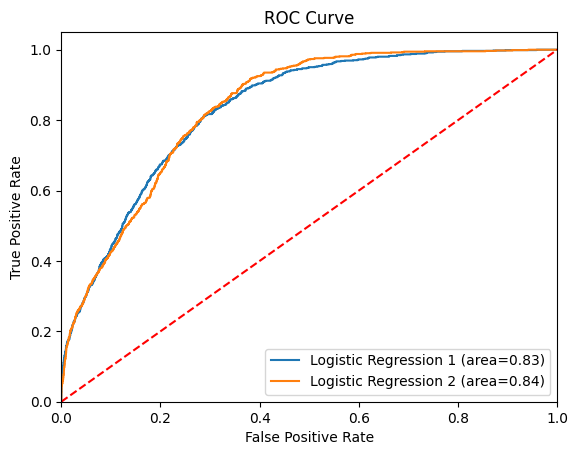

In [34]:
fpr_2, tpr_2, thresholds_2 = roc_curve(Y_test, lr_diff_weight_model.predict_proba(X_test)[:,1])
auc_var_2=auc(fpr_2, tpr_2)

plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression 1 (area=%0.2f)' % auc_var)
plt.plot(fpr_2,tpr_2,label='Logistic Regression 2 (area=%0.2f)' % auc_var_2)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [35]:
logit_model = sm.Logit(Y_train, X_train)
logistic_results = logit_model.fit()

         Current function value: 0.249499
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
print(logistic_results.summary2())

                                    Results: Logit
Model:                      Logit                   Method:                  MLE       
Dependent Variable:         is_promoted             Pseudo R-squared:        0.147     
Date:                       2023-08-20 09:50        AIC:                     21985.0599
No. Observations:           43846                   BIC:                     22445.5471
Df Model:                   52                      Log-Likelihood:          -10940.   
Df Residuals:               43793                   LL-Null:                 -12830.   
Converged:                  0.0000                  LLR p-value:             0.0000    
No. Iterations:             35.0000                 Scale:                   1.0000    
---------------------------------------------------------------------------------------
                              Coef.    Std.Err.     z     P>|z|     [0.025     0.975]  
---------------------------------------------------------------------